In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Loading and Initial Exploration

In [4]:
df = pd.read_csv('data/50krecords.csv')

In [5]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10047956568026797881,0,2014-10-21 00:00:00,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,5a83756c,1f0bc64f,1,0,20366,320,50,2333,0,39,-1,157
1,10060080737601186118,0,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,c6e93acc,8a4875bd,1,0,15701,320,50,1722,0,35,100084,79
2,10101644009186275581,0,2014-10-21 00:00:00,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,0f2161f8,a96a47c0,96db84ee,b4196eca,4,0,21665,320,50,2493,3,35,-1,117
3,10242171825760542111,0,2014-10-21 00:00:00,1005,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,61468736,5db079b5,1,2,20366,320,50,2333,0,39,100103,157
4,10260687987362092029,0,2014-10-21 00:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,a99f214a,056c2c1b,4ea23a13,1,0,20596,320,50,2161,0,35,-1,157


In [6]:
# DATA TYPES AND NULL VALUES
data_info = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Null_Count': df.isnull().sum(),
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique_Values': df.nunique()
})

display(data_info)

,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values
id,id,uint64,50000,0,0.0,50000
click,click,int64,50000,0,0.0,2
hour,hour,object,50000,0,0.0,240
C1,C1,int64,50000,0,0.0,7
banner_pos,banner_pos,int64,50000,0,0.0,7
site_id,site_id,object,50000,0,0.0,1156
site_domain,site_domain,object,50000,0,0.0,1008
site_category,site_category,object,50000,0,0.0,18
app_id,app_id,object,50000,0,0.0,977
app_domain,app_domain,object,50000,0,0.0,68


In [7]:
# STATISTICAL SUMMARY
df.describe(include='all')

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,5.000000e+04,50000.000000,50000,50000.000000,50000.000000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,NaN,240,NaN,NaN,1156,1008,18,977,68,19,8466,41437,2530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2014-10-22 09:00:00,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,601,NaN,NaN,18182,18858,20550,31818,33565,32245,41327,243,3071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.203380e+18,0.169340,NaN,1004.966860,0.286100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014940,0.333960,18821.039320,318.923360,60.338520,2110.813760,1.428600,226.673560,53191.299200,83.379360
std,5.346819e+18,0.375056,NaN,1.089397,0.510227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.526234,0.856111,4979.385322,21.572239,47.818843,610.651618,1.325978,351.669309,49958.955889,70.185595
min,2.905526e+14,0.000000,NaN,1001.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.526662e+18,0.000000,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.200031e+18,0.000000,NaN,1005.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000
75%,1.383764e+19,0.000000,NaN,1005.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,21883.000000,320.000000,50.000000,2524.000000,3.000000,171.000000,100094.000000,101.000000


## 2. Data Cleaning and Preprocessing

In [8]:
# DATA QUALITY ASSESSMENT
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")

print(f"\nUnique values in key columns:")
print(f"- Click values: {sorted(df['click'].unique())}")
print(f"- Banner position values: {sorted(df['banner_pos'].unique())}")
print(f"- Device type values: {sorted(df['device_type'].unique())}")

df_clean = df.dropna()
df_clean = df_clean.drop_duplicates()
print(f"\nFinal cleaned dataset shape: {df_clean.shape}")

Missing Values: 0
Duplicate Rows: 0

Unique values in key columns:
- Click values: [0, 1]
- Banner position values: [0, 1, 2, 3, 4, 5, 7]
- Device type values: [0, 1, 4, 5]

Final cleaned dataset shape: (50000, 24)


In [9]:
# Convert hour column to datetime
df_clean['hour'] = pd.to_datetime(df_clean['hour'])

# Extract temporal features
df_clean['day_of_week'] = df_clean['hour'].dt.day_name()
df_clean['hour_of_day'] = df_clean['hour'].dt.hour
df_clean['is_weekend'] = df_clean['hour'].dt.weekday.isin([5, 6]).astype(int)

# Create time of day categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_clean['time_of_day'] = df_clean['hour_of_day'].apply(categorize_time)

In [10]:
high_cardinality_cols = ['site_id', 'site_domain', 'app_id', 'app_domain', 'device_id', 'device_ip']

print(f"High cardinality columns (>1000 unique values):")
for col in high_cardinality_cols:
    if col in df_clean.columns:
        unique_count = df_clean[col].nunique()
        print(f"- {col}: {unique_count} unique values")

High cardinality columns (>1000 unique values):
- site_id: 1156 unique values
- site_domain: 1008 unique values
- app_id: 977 unique values
- app_domain: 68 unique values
- device_id: 8466 unique values
- device_ip: 41437 unique values


## 3. Exploratory Data Analysis (EDA)

In [11]:
# TARGET VARIABLE ANALYSIS
click_counts = df_clean['click'].value_counts()
click_rates = df_clean['click'].value_counts(normalize=True)

print(f"Click Distribution:")
for i, (count, rate) in enumerate(zip(click_counts, click_rates)):
    label = "No Click" if i == 0 else "Click"
    print(f"• {label}: {count:,} ({rate:.4f} or {rate*100:.2f}%)")

imbalance_ratio = click_counts[0] / click_counts[1]
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}:1 (No Click : Click)")

Click Distribution:
• No Click: 41,533 (0.8307 or 83.07%)
• Click: 8,467 (0.1693 or 16.93%)
Class Imbalance Ratio: 4.91:1 (No Click : Click)


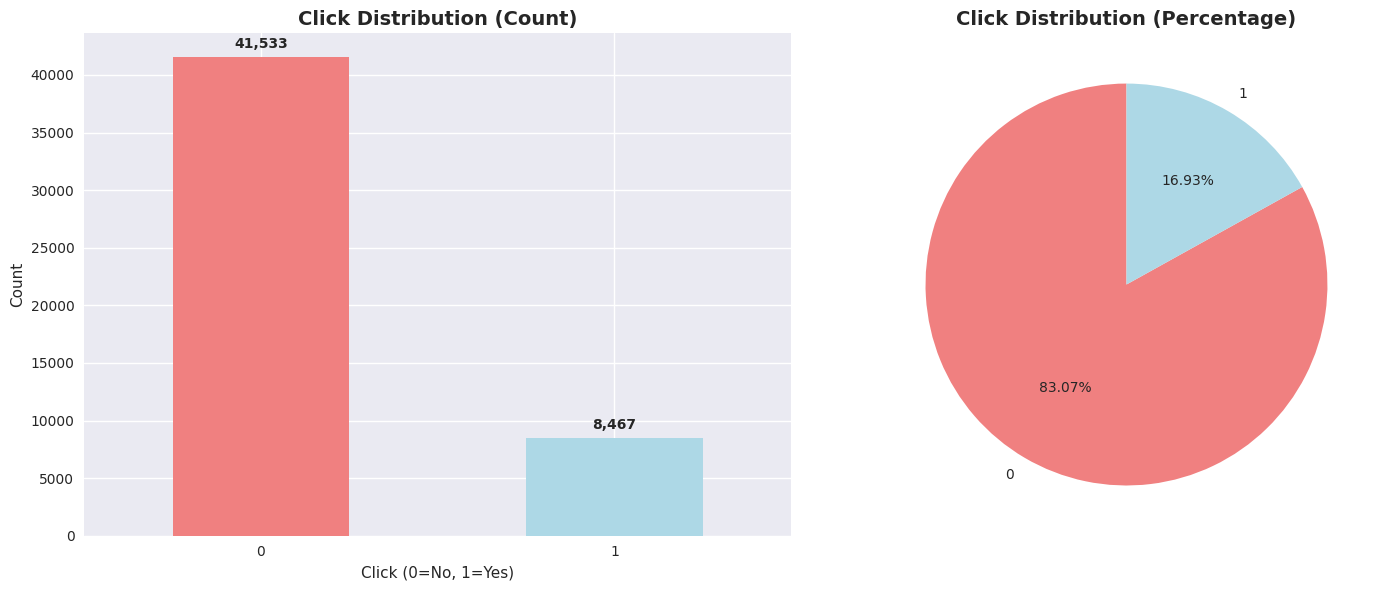

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = ['lightcoral', 'lightblue']

click_counts.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Click Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Click (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

for i, v in enumerate(click_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom', fontweight='bold')

click_counts.plot(kind='pie', ax=axes[1], autopct='%1.2f%%', colors=colors, startangle=90)
axes[1].set_title('Click Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

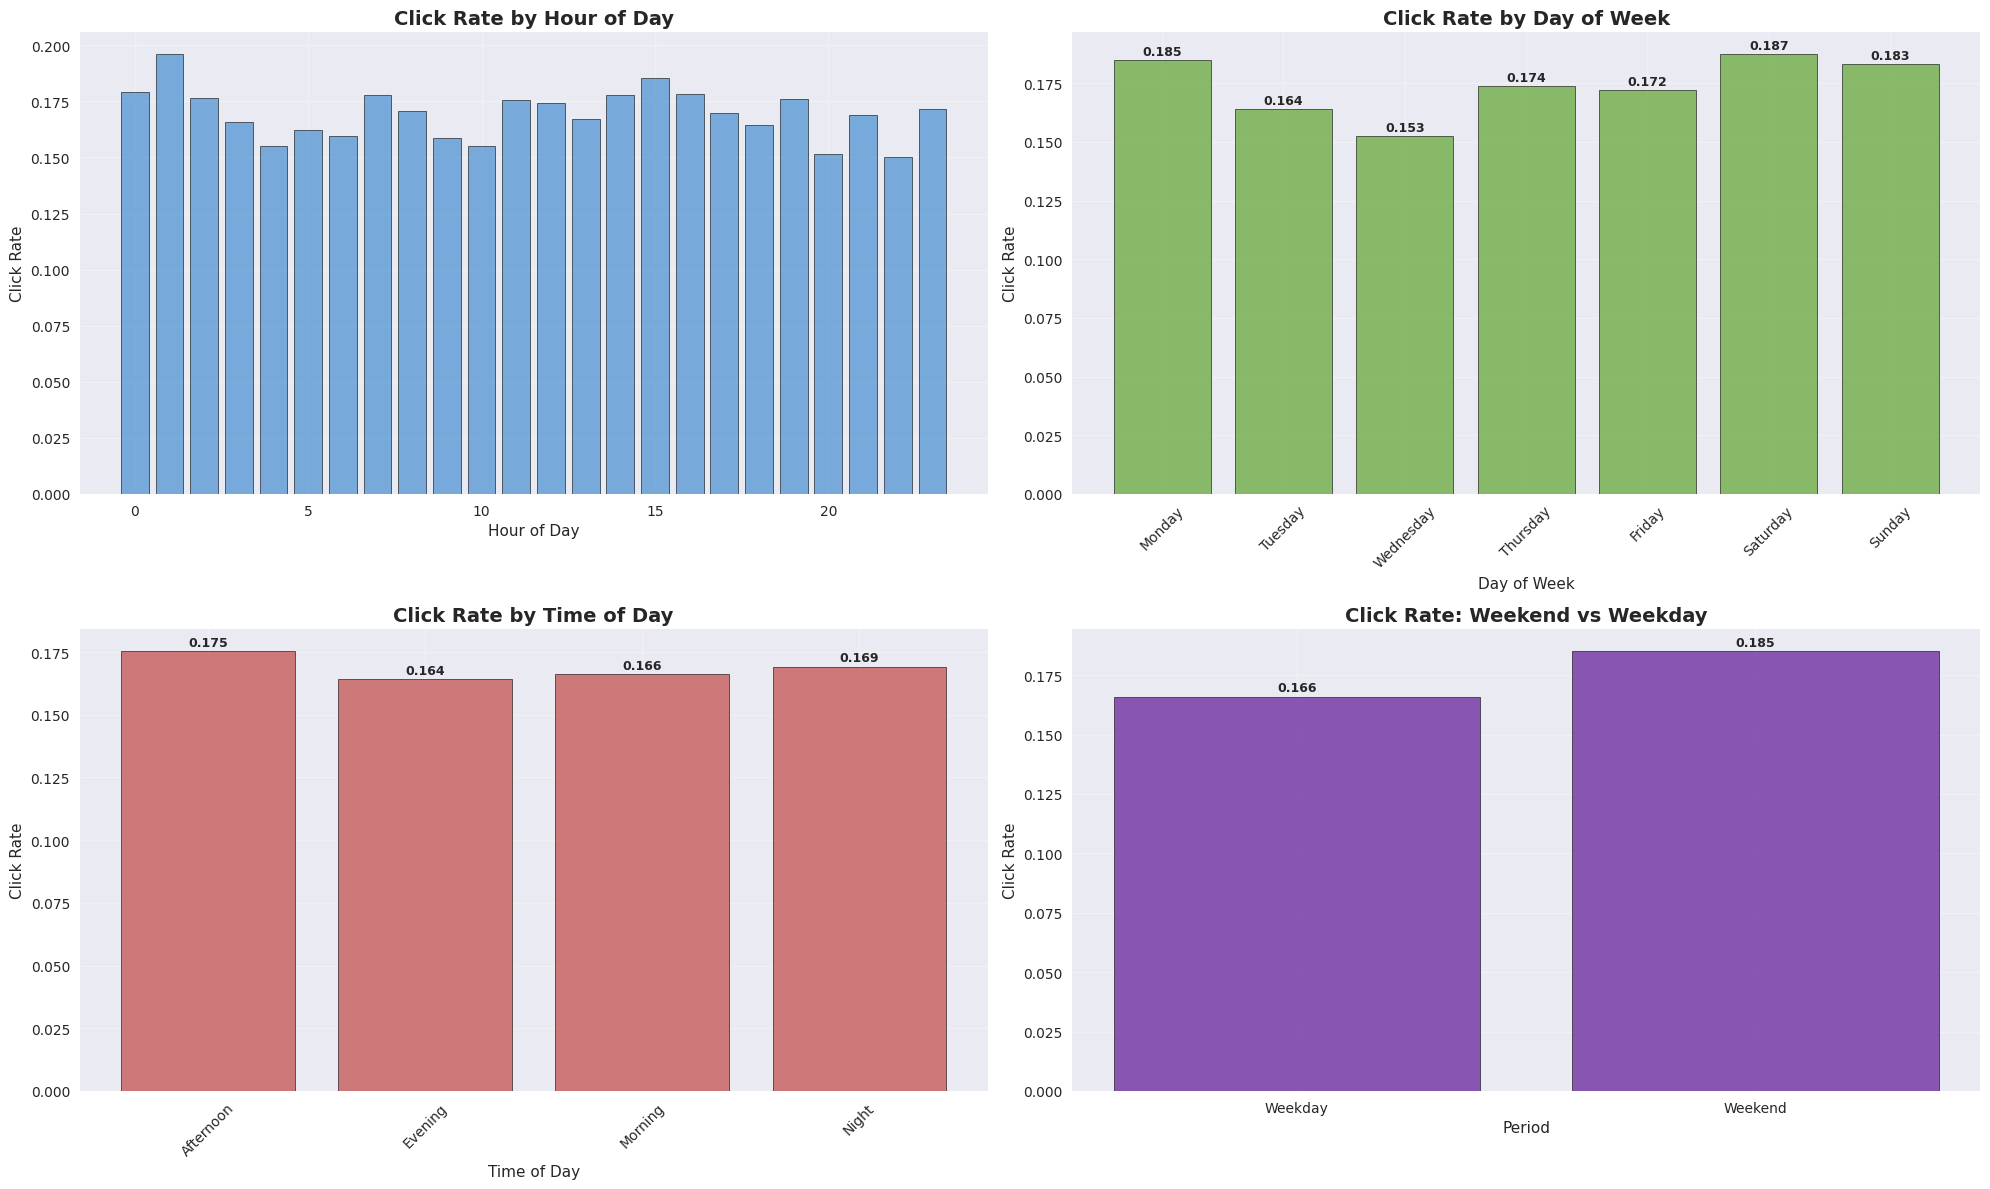

In [13]:
# Temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

colors = {'primary': '#5B9BD5', 'secondary': '#70AD47', 'tertiary': '#C55A5A', 'quaternary': '#7030A0'}

# 1. Click rate by hour of day
hourly_clicks = df_clean.groupby('hour_of_day')['click'].agg(['count', 'sum', 'mean']).reset_index()
hourly_clicks.columns = ['hour_of_day', 'total_ads', 'total_clicks', 'click_rate']

axes[0,0].bar(hourly_clicks['hour_of_day'], hourly_clicks['click_rate'], color=colors['primary'], alpha=0.8, edgecolor='black', linewidth=0.5)
axes[0,0].set_title('Click Rate by Hour of Day', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Click Rate')
axes[0,0].grid(True, alpha=0.3)

# 2. Click rate by day of week
daily_clicks = df_clean.groupby('day_of_week')['click'].agg(['count', 'sum', 'mean']).reset_index()
daily_clicks.columns = ['day_of_week', 'total_ads', 'total_clicks', 'click_rate']

# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_clicks['day_of_week'] = pd.Categorical(daily_clicks['day_of_week'], categories=day_order, ordered=True)
daily_clicks = daily_clicks.sort_values('day_of_week')

axes[0,1].bar(range(len(daily_clicks)), daily_clicks['click_rate'], color=colors['secondary'], alpha=0.8, edgecolor='black', linewidth=0.5)
axes[0,1].set_title('Click Rate by Day of Week', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Click Rate')
axes[0,1].set_xticks(range(len(daily_clicks)))
axes[0,1].set_xticklabels(daily_clicks['day_of_week'], rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Click rate by time of day
time_clicks = df_clean.groupby('time_of_day')['click'].agg(['count', 'sum', 'mean']).reset_index()
time_clicks.columns = ['time_of_day', 'total_ads', 'total_clicks', 'click_rate']

axes[1,0].bar(time_clicks['time_of_day'], time_clicks['click_rate'], color=colors['tertiary'], alpha=0.8, edgecolor='black', linewidth=0.5)
axes[1,0].set_title('Click Rate by Time of Day', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Time of Day')
axes[1,0].set_ylabel('Click Rate')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Weekend vs Weekday
weekend_clicks = df_clean.groupby('is_weekend')['click'].agg(['count', 'sum', 'mean']).reset_index()
weekend_clicks.columns = ['is_weekend', 'total_ads', 'total_clicks', 'click_rate']
weekend_clicks['period'] = weekend_clicks['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

axes[1,1].bar(weekend_clicks['period'], weekend_clicks['click_rate'], color=colors['quaternary'], alpha=0.8, edgecolor='black', linewidth=0.5)
axes[1,1].set_title('Click Rate: Weekend vs Weekday', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Period')
axes[1,1].set_ylabel('Click Rate')
axes[1,1].grid(True, alpha=0.3)

datasets = [time_clicks, weekend_clicks, daily_clicks]
subplot_axes = [axes[1,0], axes[1,1], axes[0,1]]

for ax, data in zip(subplot_axes, datasets):
    for i, v in enumerate(data['click_rate']):
        ax.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
print(f"TEMPORAL INSIGHTS:")
print(f"- Peak hour: {hourly_clicks.loc[hourly_clicks['click_rate'].idxmax(), 'hour_of_day']}:00 (CTR: {hourly_clicks['click_rate'].max():.4f})")
print(f"- Best day: {daily_clicks.loc[daily_clicks['click_rate'].idxmax(), 'day_of_week']} (CTR: {daily_clicks['click_rate'].max():.4f})")
print(f"- Best time period: {time_clicks.loc[time_clicks['click_rate'].idxmax(), 'time_of_day']} (CTR: {time_clicks['click_rate'].max():.4f})")
print(f"- Weekend vs Weekday: {'Weekend' if weekend_clicks.loc[1, 'click_rate'] > weekend_clicks.loc[0, 'click_rate'] else 'Weekday'} performs better")

TEMPORAL INSIGHTS:
- Peak hour: 1:00 (CTR: 0.1960)
- Best day: Saturday (CTR: 0.1873)
- Best time period: Afternoon (CTR: 0.1753)
- Weekend vs Weekday: Weekend performs better


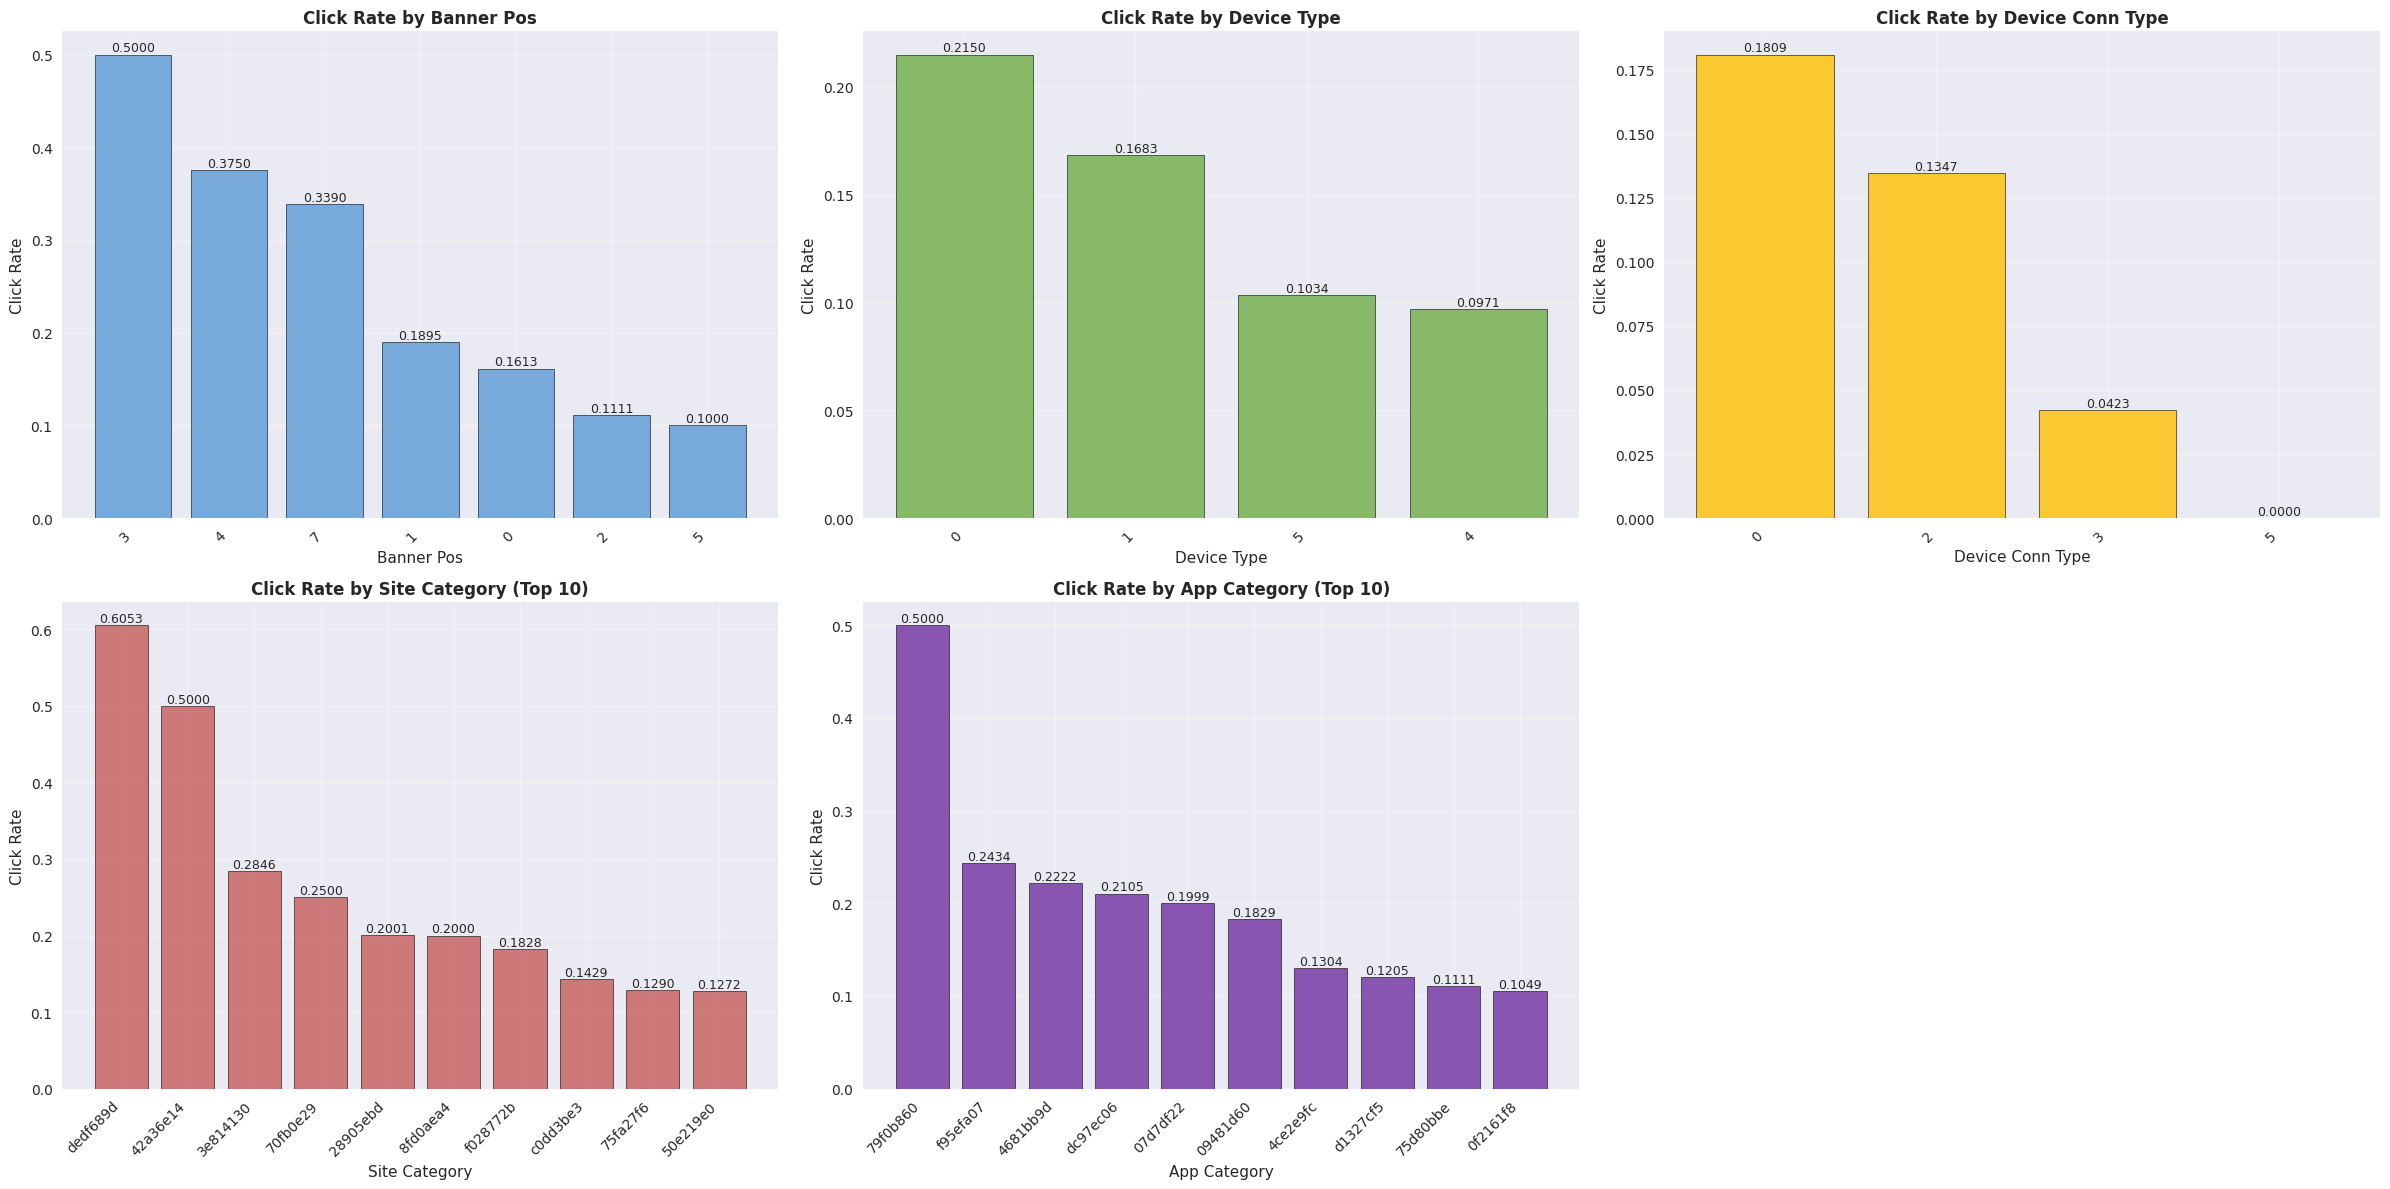

In [15]:
# Device and Categorical Features Analysis
categorical_features = ['banner_pos', 'device_type', 'device_conn_type', 'site_category', 'app_category']

fig, axes = plt.subplots(2, 3, figsize=(24, 12))
axes = axes.flatten()

colors = ['#5B9BD5', '#70AD47', '#FFC000', '#C55A5A', '#7030A0']

for i, feature in enumerate(categorical_features):
    if feature in df_clean.columns:
        feature_analysis = df_clean.groupby(feature)['click'].agg(['count', 'sum', 'mean']).reset_index()
        feature_analysis.columns = [feature, 'total_ads', 'total_clicks', 'click_rate']
        feature_analysis = feature_analysis.sort_values('click_rate', ascending=False)
        
        if len(feature_analysis) > 10:
            plot_data = feature_analysis.head(10)
            title_suffix = " (Top 10)"
        else:
            plot_data = feature_analysis
            title_suffix = ""
            
        bar_colors = [colors[i % len(colors)]] * len(plot_data)
        axes[i].bar(range(len(plot_data)), plot_data['click_rate'], color=bar_colors, alpha=0.8, edgecolor='black', linewidth=0.5)
        axes[i].set_title(f'Click Rate by {feature.replace("_", " ").title()}{title_suffix}',  fontsize=12, fontweight='bold')
        axes[i].set_xlabel(feature.replace("_", " ").title())
        axes[i].set_ylabel('Click Rate')
        axes[i].set_xticks(range(len(plot_data)))
        axes[i].set_xticklabels(plot_data[feature], rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3)
        
        for j, v in enumerate(plot_data['click_rate']):
            axes[i].text(j, v + 0.0001, f'{v:.4f}', ha='center', va='bottom', fontsize=9)
        
if len(categorical_features) < 6:
    axes[5].remove()

plt.tight_layout()
plt.show()

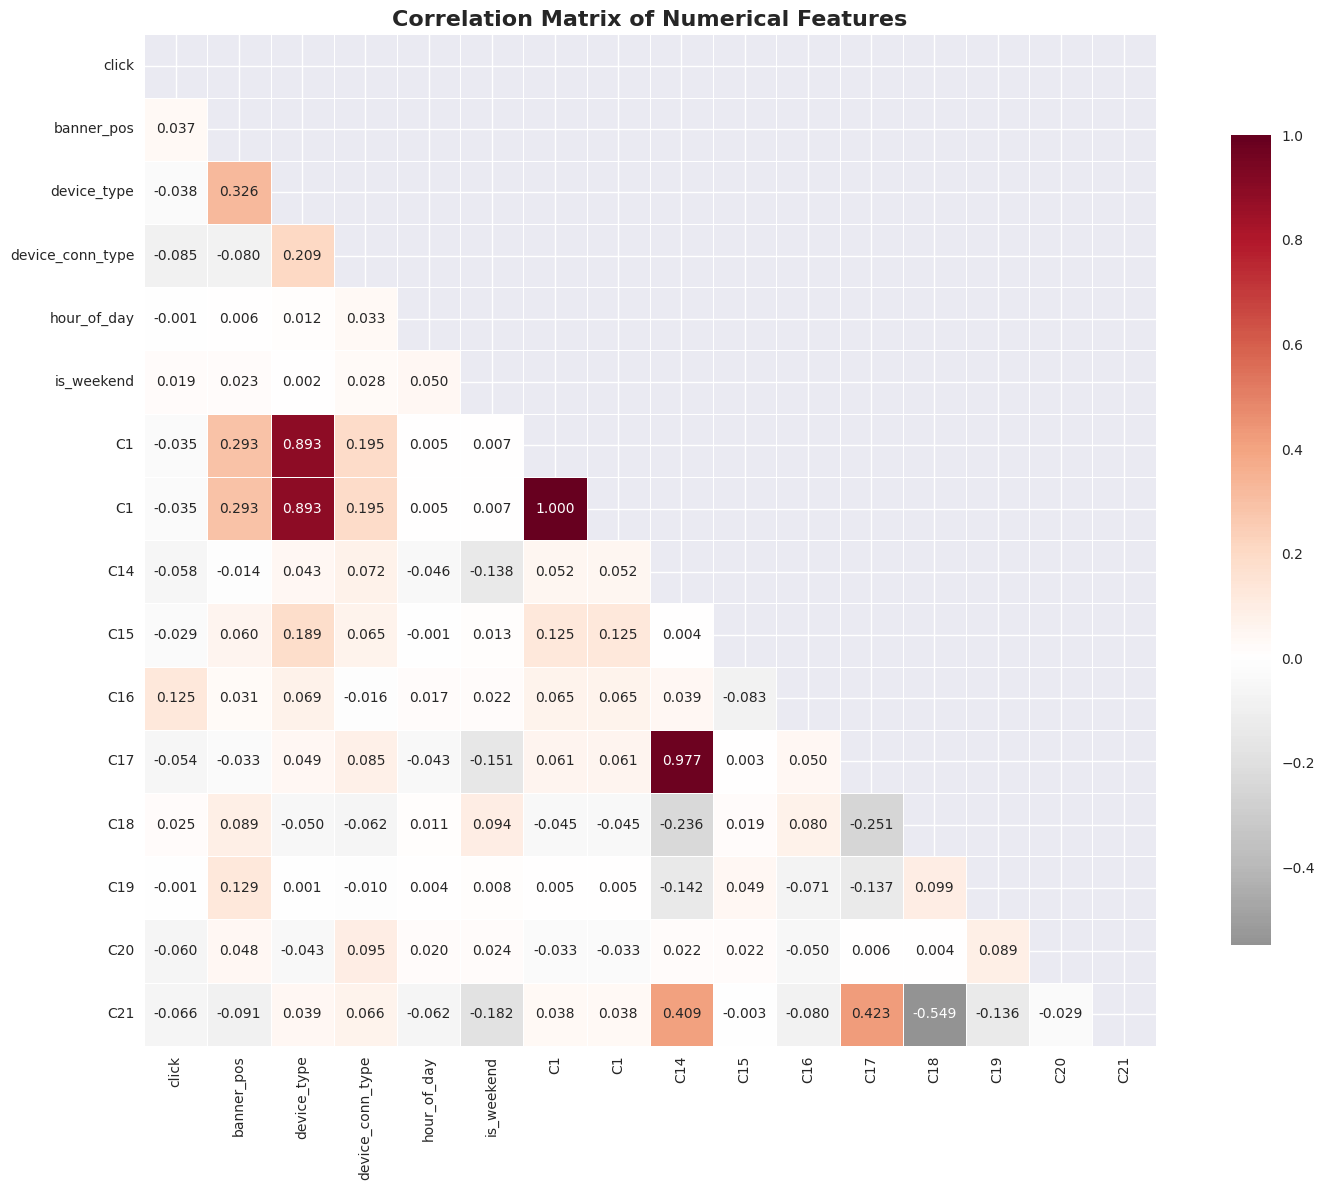

In [16]:
# Correlation Analysis
numerical_features = ['click', 'banner_pos', 'device_type', 'device_conn_type', 'hour_of_day', 'is_weekend', 'C1'] + [col for col in df_clean.columns if col.startswith('C') and col[1:].isdigit()]

corr_data = df_clean[numerical_features].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_data, dtype=bool)) 

sns.heatmap(corr_data, annot=True, cmap='RdGy_r', center=0, 
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, mask=mask,
            linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Outlier detection
numerical_cols = ['banner_pos', 'device_type', 'device_conn_type', 'hour_of_day'] + [col for col in df_clean.columns if col.startswith('C') and col[1:].isdigit()]

outlier_summary = []
for col in numerical_cols:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df_clean)) * 100
        
        outlier_summary.append({
            'Feature': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': outlier_percentage,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier_Percentage', ascending=False)

print("Outlier Summary (using IQR method):")
display(outlier_df.head(10))

Outlier Summary (using IQR method):


,Feature,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound
10,C19,8908,17.816,-169.0,375.0
12,C21,7117,14.234,-94.0,218.0
2,device_conn_type,6927,13.854,0.0,0.0
8,C17,4248,8.496,871.5,3515.5
5,C14,4182,8.364,9475.5,29327.5
4,C1,4029,8.058,1005.0,1005.0
1,device_type,3831,7.662,1.0,1.0
6,C15,3400,6.800,320.0,320.0
7,C16,2887,5.774,50.0,50.0
0,banner_pos,79,0.158,-1.5,2.5


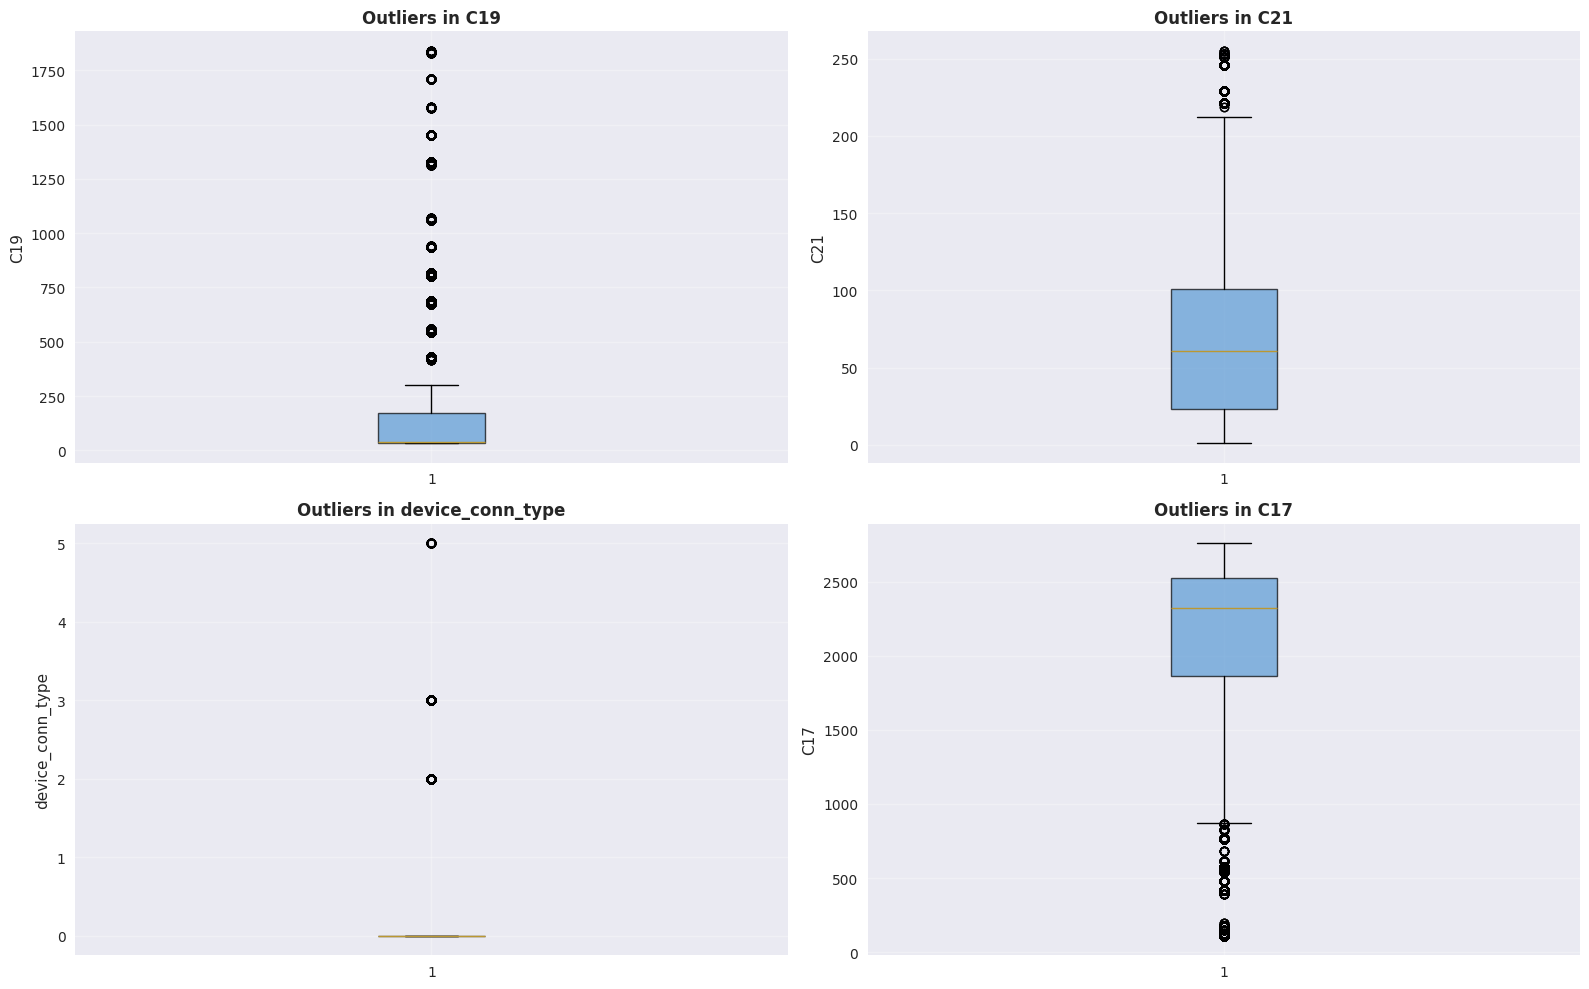

In [18]:
features_with_outliers = outlier_df[outlier_df['Outlier_Percentage'] > 0]['Feature'].head(4)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features_with_outliers):
    bp = axes[i].boxplot(df_clean[feature], patch_artist=True)
    bp['boxes'][0].set_facecolor('#5B9BD5')
    bp['boxes'][0].set_alpha(0.7)
    axes[i].set_title(f'Outliers in {feature}', fontweight='bold')
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3)

for j in range(len(features_with_outliers), 4):
    axes[j].remove()

plt.tight_layout()
plt.show()

In [19]:
# Interactive time series plot
daily_trends = df_clean.groupby(df_clean['hour'].dt.date)['click'].agg(['count', 'sum', 'mean']).reset_index()
daily_trends.columns = ['date', 'total_ads', 'total_clicks', 'click_rate']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=daily_trends['date'], 
    y=daily_trends['click_rate'],
    mode='lines+markers',
    name='Click Rate',
    line=dict(color='#2E86AB', width=2),
    marker=dict(size=4, color='#2E86AB')
))

fig.update_layout(
    title='Daily Click Rate Trend Over Time',
    xaxis_title='Date',
    yaxis_title='Click Rate',
    hovermode='x unified',
    template='plotly_white',
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()

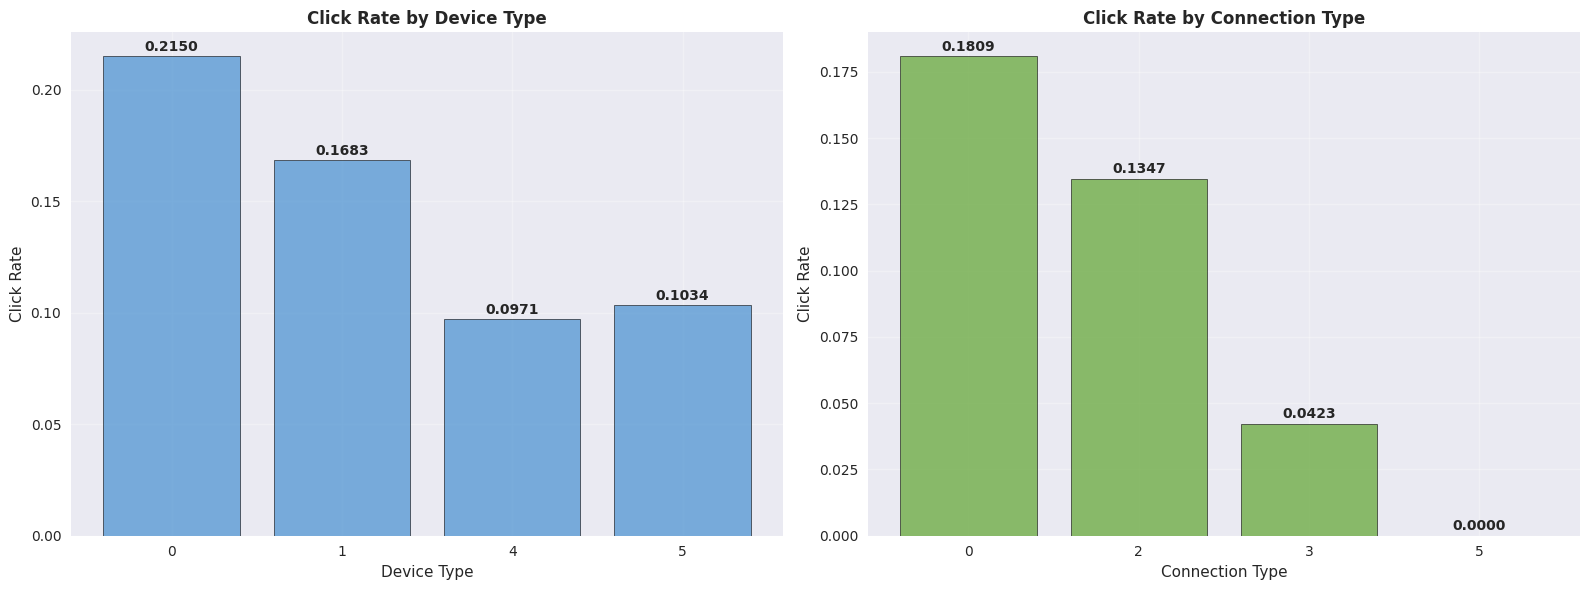

In [20]:
# Device Type vs Connection Type Analysis
device_conn_analysis = df_clean.groupby(['device_type', 'device_conn_type'])['click'].agg(['count', 'mean']).reset_index()
device_conn_analysis.columns = ['device_type', 'device_conn_type', 'count', 'click_rate']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Device type click rates
device_summary = df_clean.groupby('device_type')['click'].agg(['count', 'mean']).reset_index()
device_summary.columns = ['device_type', 'total_ads', 'click_rate']

ax1.bar(device_summary['device_type'].astype(str), device_summary['click_rate'], 
        color='#5B9BD5', alpha=0.8, edgecolor='black', linewidth=0.5)
ax1.set_title('Click Rate by Device Type', fontweight='bold')
ax1.set_xlabel('Device Type')
ax1.set_ylabel('Click Rate')
ax1.grid(True, alpha=0.3)

for i, v in enumerate(device_summary['click_rate']):
    ax1.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Connection type click rates
conn_summary = df_clean.groupby('device_conn_type')['click'].agg(['count', 'mean']).reset_index()
conn_summary.columns = ['device_conn_type', 'total_ads', 'click_rate']

ax2.bar(conn_summary['device_conn_type'].astype(str), conn_summary['click_rate'], 
        color='#70AD47', alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Click Rate by Connection Type', fontweight='bold')
ax2.set_xlabel('Connection Type')
ax2.set_ylabel('Click Rate')
ax2.grid(True, alpha=0.3)

for i, v in enumerate(conn_summary['click_rate']):
    ax2.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [21]:
# Click Rate by Hour and Banner Position
fig = go.Figure()

hour_banner_analysis = df_clean.groupby(['hour_of_day', 'banner_pos'])['click'].agg(['count', 'mean']).reset_index()
hour_banner_analysis.columns = ['hour_of_day', 'banner_pos', 'ad_count', 'click_rate']

min_ads = 50
filtered_data = hour_banner_analysis[hour_banner_analysis['ad_count'] >= min_ads]

fig.add_trace(go.Scatter(
    x=filtered_data['hour_of_day'],
    y=filtered_data['click_rate'],
    mode='markers',
    marker=dict(
        size=filtered_data['ad_count']/50,  
        color='#5B9BD5', 
        opacity=0.7,
        line=dict(width=1, color='black')
    ),
    text=[f'Hour: {h}<br>Banner Pos: {b}<br>Click Rate: {cr:.4f}<br>Ads: {ac}' 
          for h, b, cr, ac in zip(filtered_data['hour_of_day'], filtered_data['banner_pos'], 
                                 filtered_data['click_rate'], filtered_data['ad_count'])],
    hovertemplate='%{text}<extra></extra>',
    name='Click Rate by Hour'
))

fig.update_layout(
    title='Click Rate Distribution by Hour of Day',
    xaxis_title='Hour of Day',
    yaxis_title='Click Rate',
    template='plotly_white',
    showlegend=False,
    plot_bgcolor='white'
)

fig.show()

## 4. Baseline Model

### Feature Engineering

In [22]:
# Select features for modeling
feature_columns = [
    'banner_pos', 'device_type', 'device_conn_type',
    'hour_of_day', 'is_weekend', 'time_of_day',
    'site_category', 'app_category'
] + [col for col in df_clean.columns if col.startswith('C') and col[1:].isdigit()]

print(f"Selected {len(feature_columns)} features for modeling:")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")

Selected 17 features for modeling:
 1. banner_pos
 2. device_type
 3. device_conn_type
 4. hour_of_day
 5. is_weekend
 6. time_of_day
 7. site_category
 8. app_category
 9. C1
10. C14
11. C15
12. C16
13. C17
14. C18
15. C19
16. C20
17. C21


In [23]:
# Prepare the dataset for modeling
X = df_clean[feature_columns].copy()
y = df_clean['click'].copy()

print(f"\nModel dataset shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")


Model dataset shape: (50000, 17)
Target distribution: {0: 41533, 1: 8467}


In [24]:
# Handle categorical variables
categorical_columns = ['time_of_day', 'site_category', 'app_category']
categorical_columns = [col for col in categorical_columns if col in X.columns]

# Label encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"Label encoded {col}: {len(le.classes_)} unique categories")

Label encoded time_of_day: 4 unique categories
Label encoded site_category: 18 unique categories
Label encoded app_category: 19 unique categories


In [25]:
print(f"Feature preparation completed. Final shape: {X.shape}")
print(f"Data types: {X.dtypes.value_counts().to_dict()}")

Feature preparation completed. Final shape: (50000, 17)
Data types: {dtype('int64'): 16, dtype('int32'): 1}


### Model Training and Evaluation

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set class distribution: {y_train.value_counts().to_dict()}")
print(f"Test set class distribution: {y_test.value_counts().to_dict()}")

Training set shape: (40000, 17)
Test set shape: (10000, 17)
Training set class distribution: {0: 33226, 1: 6774}
Test set class distribution: {0: 8307, 1: 1693}


In [27]:
# Train Random Forest Classifier
print(f"Training Random Forest Classifier")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Random Forest ROC-AUC: {roc_auc:.4f}")

Training Random Forest Classifier
Random Forest ROC-AUC: 0.6960
Random Forest ROC-AUC: 0.6960


In [28]:
# Train a Logistic Regression as comparison
print(f"Training Logistic Regression")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.4f}")

Training Logistic Regression
Logistic Regression ROC-AUC: 0.6323
Logistic Regression ROC-AUC: 0.6323


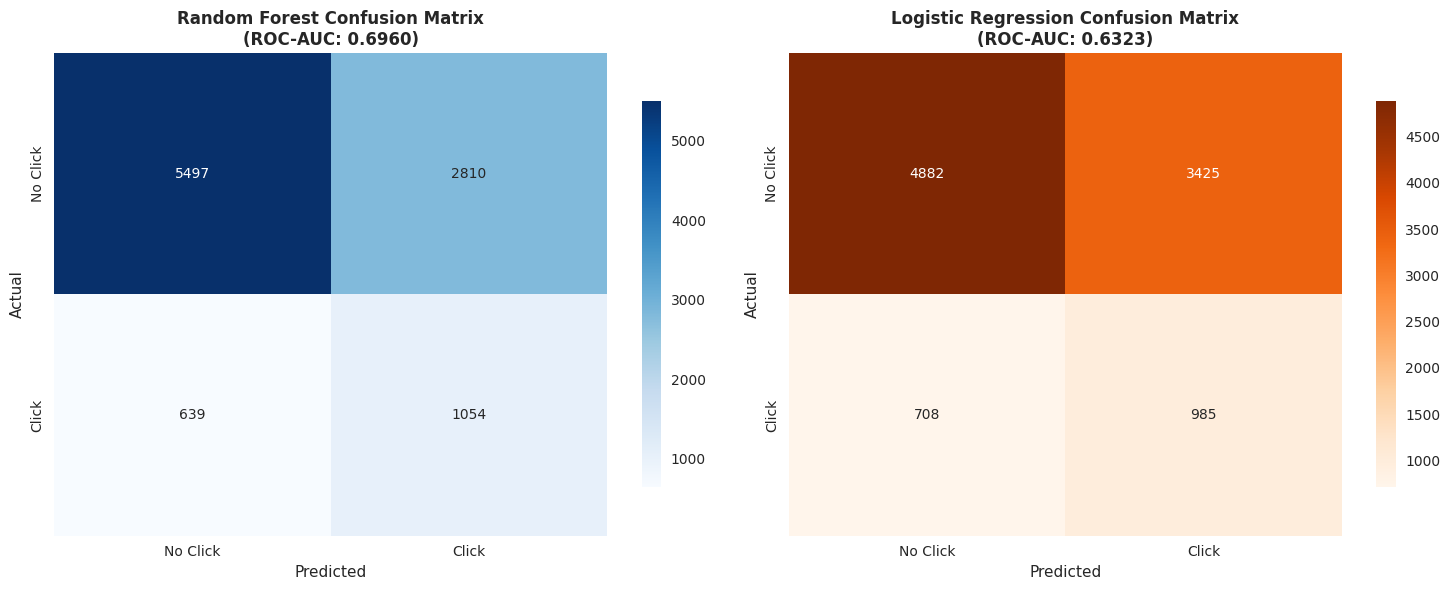

In [29]:
# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'],
            cbar_kws={'shrink': 0.8})
axes[0].set_title(f'Random Forest Confusion Matrix\n(ROC-AUC: {roc_auc:.4f})', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'],
            cbar_kws={'shrink': 0.8})
axes[1].set_title(f'Logistic Regression Confusion Matrix\n(ROC-AUC: {roc_auc_lr:.4f})', fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [30]:
def calculate_metrics(cm, model_name, roc_auc_score):
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'Model': model_name,
        'Accuracy': f"{accuracy:.4f}",
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}",
        'F1-Score': f"{f1:.4f}",
        'ROC-AUC': f"{roc_auc_score:.4f}"
    }

rf_metrics = calculate_metrics(cm_rf, "Random Forest", roc_auc)
lr_metrics = calculate_metrics(cm_lr, "Logistic Regression", roc_auc_lr)

performance_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [f"{rf_metrics['Accuracy']}", f"{lr_metrics['Accuracy']}"],
    'Precision': [f"{rf_metrics['Precision']}", f"{lr_metrics['Precision']}"],
    'Recall': [f"{rf_metrics['Recall']}", f"{lr_metrics['Recall']}"],
    'F1-Score': [f"{rf_metrics['F1-Score']}", f"{lr_metrics['F1-Score']}"],
    'ROC-AUC': [f"{rf_metrics['ROC-AUC']}", f"{lr_metrics['ROC-AUC']}"]
})
display(performance_df.set_index('Model'))

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Model,,,,,
Random Forest,0.6551,0.2728,0.6226,0.3793,0.6960
Logistic Regression,0.5867,0.2234,0.5818,0.3228,0.6323


### Feature Importance and Model Interpretation

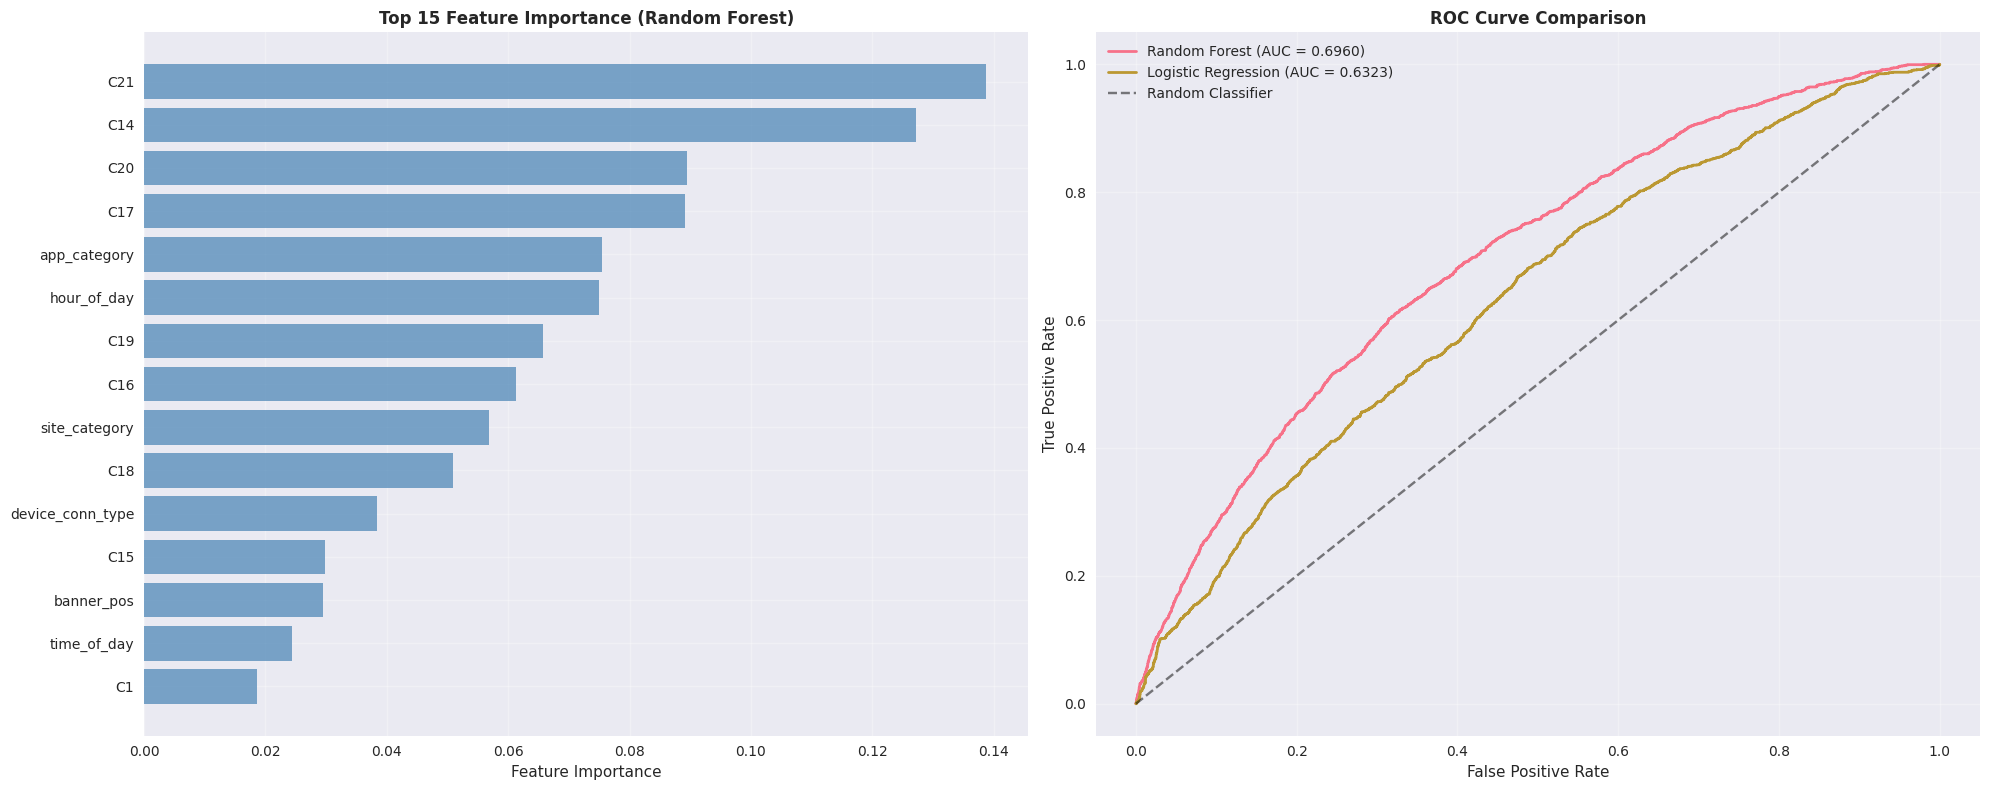

In [31]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot feature importance
top_features = feature_importance.head(15)
axes[0].barh(range(len(top_features), 0, -1), top_features['importance'], color='steelblue', alpha=0.7)
axes[0].set_yticks(range(len(top_features), 0, -1))
axes[0].set_yticklabels(top_features['feature'])
axes[0].set_xlabel('Feature Importance')
axes[0].set_title('Top 15 Feature Importance (Random Forest)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

axes[1].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc:.4f})', linewidth=2)
axes[1].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve Comparison', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


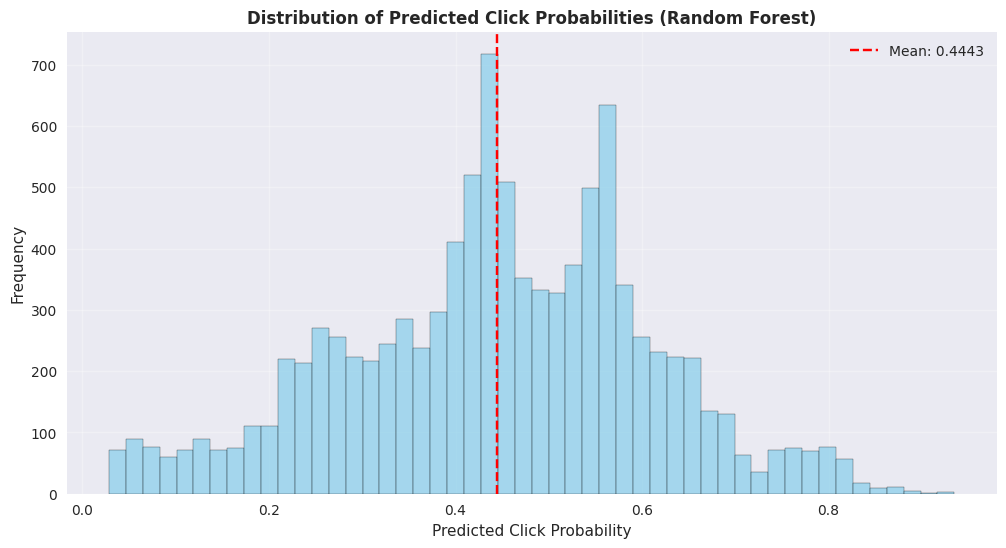

In [32]:
# Plot probability distribution
plt.figure(figsize=(12, 6))
plt.hist(y_pred_proba, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Click Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Click Probabilities (Random Forest)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(y_pred_proba.mean(), color='red', linestyle='--', label=f'Mean: {y_pred_proba.mean():.4f}')
plt.legend()
plt.show()